In [1]:
!pip install sentence-transformers

     |████████████████████████████████| 85 kB 329 kB/s 
     |████████████████████████████████| 2.5 MB 1.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=173de524c8d09f7bf31650699b0546396f8e41561849944994eb251d664590d0
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.5.1
    Uninstalling transformers-4.5.1:
      Successfully uninstalled transformers-4.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.3.0 requires transformers<4.6,>=4.1, but you have transformers 4.8.2 which is incompatible.


In [2]:
!nvidia-smi 

Mon Jul  5 08:01:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import pandas as pd
import time
from tqdm import tqdm
import seaborn as sns
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/554 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [4]:
def fetch_movie_info(dataframe_idx):
    info = df.iloc[dataframe_idx]
    meta_dict = {}
    meta_dict['Title'] = info['Title']
    meta_dict['Plot'] = info['Plot'][:500]
    return meta_dict
    
def search(query, top_k, index, model):
    t=time.time()
    query_vector = model.encode([query])
    top_k = index.search(query_vector, top_k)
    print('>>>> Results in Total Time: {}'.format(time.time()-t))
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [fetch_movie_info(idx) for idx in top_k_ids]
    return results

In [5]:
data = pd.read_csv('../input/wikipedia-movie-plots/wiki_movie_plots_deduped.csv',memory_map=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [6]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [7]:
import gc
df = data[['Title','Plot']]


In [8]:
df.dropna(inplace=True)
df.drop_duplicates(subset=['Plot'],inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
!pip install faiss-gpu

     |████████████████████████████████| 89.7 MB 11.5 MB/s 


In [10]:
import faiss
encoded_data = model.encode(df.Plot.tolist())
encoded_data = np.asarray(encoded_data.astype('float32'))
index = faiss.IndexIDMap(faiss.IndexFlatIP(768))
index.add_with_ids(encoded_data, np.array(range(0, len(df))))
faiss.write_index(index, 'movie_plot.index')

Batches:   0%|          | 0/1059 [00:00<?, ?it/s]

In [11]:
from pprint import pprint

query="Artificial Intelligence based action movie"
results=search(query, top_k=5, index=index, model=model)

print("\n")
for result in results:
    print('\t',pprint(result))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

>>>> Results in Total Time: 0.08326864242553711


{'Plot': 'As the film opens, two mysterious white circles are moving about on '
         "a solid black background. As they move, a woman's voice says they "
         'must obtain human bodies to carry out their mission.\r\n'
         'Live action then begins with a man and woman leaving a beach near '
         'Cape Canaveral, Florida. The circles descend on them, causing their '
         'car to crash. Both are killed. But their bodies suddenly jerk back '
         "to life as they're taken over by the white circles, which are "
         "actually extraterrestrials. The woman's face is b",
 'Title': 'The Cape Canaveral Monsters'}
	 None
{'Plot': 'Top defense contractor GloboTech Industries acquires the Heartland '
         'Toy Company and as part of the move, Globotech CEO Gil Mars tells '
         'Heartland toy designers Larry Benson and Irwin Wayfair to develop '
         'actual live-action toys capable of "playing back". Mars se

# Re-Ranker: Cross-Encoder

The retriever has to be efficient for large document collections with millions of entries. However, it might return irrelevant candidates.

A re-ranker based on a Cross-Encoder can substantially improve the final results for the user. The query and a possible document is passed simultaneously to transformer network, which then outputs a single score between 0 and 1 indicating how relevant the document is for the given query.

The advantage of Cross-Encoders is the higher performance, as they perform attention across the query and the document.

Scoring thousands or millions of (query, document)-pairs would be rather slow. Hence, we use the retriever to create a set of e.g. 100 possible candidates which are then re-ranked by the Cross-Encoder.


In [12]:
## Load our cross-encoder. Use fast tokenizer to speed up the tokenization
from sentence_transformers import CrossEncoder
cross_model = CrossEncoder('cross-encoder/ms-marco-TinyBERT-L-6', max_length=512)

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/541 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [13]:

def cross_score(model_inputs):
    scores = cross_model.predict(model_inputs)
    return scores

model_inputs = [[query,item['Plot']] for item in results]
scores = cross_score(model_inputs)
#Sort the scores in decreasing order
ranked_results = [{'Title': inp['Title'], 'Score': score} for inp, score in zip(results, scores)]
ranked_results = sorted(ranked_results, key=lambda x: x['Score'], reverse=True)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
print("\n")
for result in ranked_results:
    print('\t',pprint(result))



{'Score': 0.0013189373, 'Title': 'Armed Response'}
	 None
{'Score': 0.00021016104, 'Title': 'The Cape Canaveral Monsters'}
	 None
{'Score': 0.00016477783, 'Title': 'Chappie'}
	 None
{'Score': 0.00016433487,
 'Title': 'Galactic Armored Fleet Majestic Prince: Genetic Awakening'}
	 None
{'Score': 0.00016109987, 'Title': 'Small Soldiers'}
	 None


In [15]:
!pip install bert-score

     |████████████████████████████████| 59 kB 305 kB/s 


In [16]:

# check your installation
import bert_score
bert_score.__version__

'0.3.9'

In [17]:
from bert_score import score

In [18]:
ref=["Artificial Intelligence based action movie"]

In [19]:
ranked_results_bert = []

for cand in results:
    P, R, F1 = score([cand['Plot']], ref, lang='en')
    ranked_results_bert.append({'Title': cand['Title'], 'Score': F1.numpy()[0]})
    

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaM

In [20]:
#Sort the scores in decreasing order
ranked_results_bert = sorted(ranked_results_bert, key=lambda x: x['Score'], reverse=True)
print("\n")
for result in ranked_results_bert:
    print('\t',pprint(result))



{'Score': 0.84168386, 'Title': 'Armed Response'}
	 None
{'Score': 0.8134777, 'Title': 'Chappie'}
	 None
{'Score': 0.8057887, 'Title': 'Small Soldiers'}
	 None
{'Score': 0.8001482,
 'Title': 'Galactic Armored Fleet Majestic Prince: Genetic Awakening'}
	 None
{'Score': 0.7998567, 'Title': 'The Cape Canaveral Monsters'}
	 None


In [21]:
final_results = pd.DataFrame()
final_results['faiss_ranking'] = [item['Title'] for item in results]
final_results['cross_encoder'] = [item['Title'] for item in ranked_results]
final_results['bert_score'] = [item['Title'] for item in ranked_results_bert]


In [22]:
final_results.head()

,faiss_ranking,cross_encoder,bert_score
0,The Cape Canaveral Monsters,Armed Response,Armed Response
1,Small Soldiers,The Cape Canaveral Monsters,Chappie
2,Chappie,Chappie,Small Soldiers
3,Armed Response,Galactic Armored Fleet Majestic Prince: Geneti...,Galactic Armored Fleet Majestic Prince: Geneti...
4,Galactic Armored Fleet Majestic Prince: Geneti...,Small Soldiers,The Cape Canaveral Monsters


In [23]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [24]:
item_i = model.encode(['action'])
item_i = np.asarray(item_i.astype('float32'))

item_j = model.encode(['drama'])
item_j = np.asarray(item_j.astype('float32'))

item_k = model.encode(['romance'])
item_k = np.asarray(item_k.astype('float32'))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
data = np.asarray([item_i, item_j, item_k])

In [26]:
data = data.reshape((3,768))

In [27]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(data)

In [28]:
tsne_results.shape

(3, 2)

In [29]:
pca_df = pd.DataFrame()
pca_df['x'] = tsne_results[:,0]
pca_df['y'] = tsne_results[:,1]

<AxesSubplot:xlabel='x', ylabel='y'>

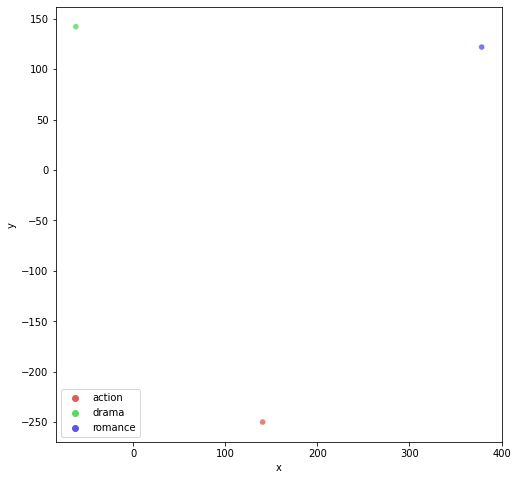

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="x", y="y",
    hue=['action','drama','romance'],
    palette=sns.color_palette("hls", 3),
    data=pca_df,
    legend="full",
    alpha=0.8
)

In [31]:
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)

action_movie_scores=[]
drama_movie_scores=[]
romance_movie_scores=[]
# generate some integers
for _ in range(10):
    action_movie_score = randint(0, 10)
    drama_movie_score = randint(0, 10)
    romance_movie_score = randint(0, 10)
    action_movie_scores.append(action_movie_score)
    drama_movie_scores.append(drama_movie_score)
    romance_movie_scores.append(romance_movie_score)

In [32]:
user_watch_hist = pd.DataFrame()
user_watch_hist['action_movie'] = action_movie_scores
user_watch_hist['drama_movie'] = drama_movie_scores
user_watch_hist['romance_movie'] = romance_movie_scores

<AxesSubplot:>

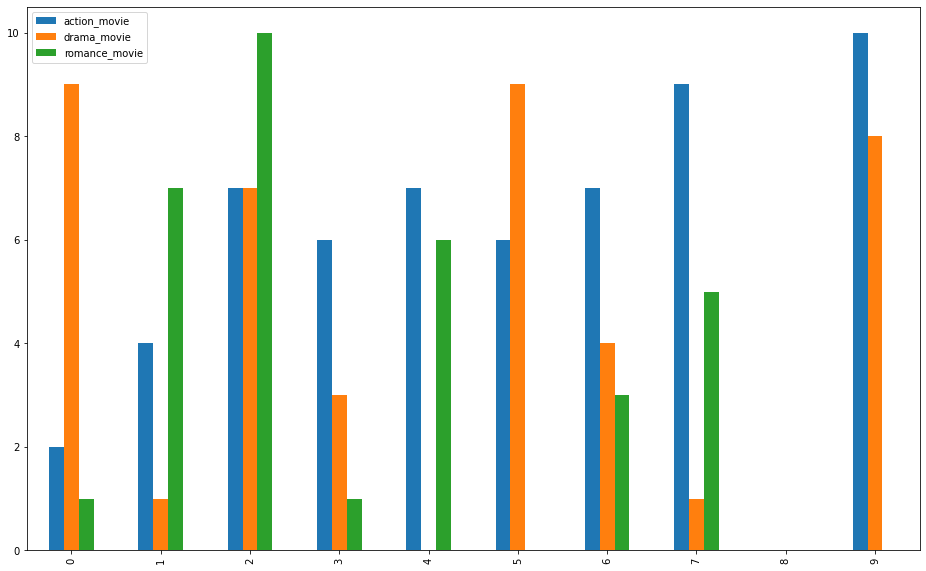

In [33]:

user_watch_hist.plot(kind='bar',figsize=(16,10))

In [34]:
user_watch_hist

,action_movie,drama_movie,romance_movie
0,2,9,1
1,4,1,7
2,7,7,10
3,6,3,1
4,7,0,6
5,6,9,0
6,7,4,3
7,9,1,5
8,0,0,0
9,10,8,0


In [35]:
import scipy.stats as stats

In [36]:
action_movie_zscore =   stats.zscore(user_watch_hist['action_movie'])[-1]
drama_movie_zscore = stats.zscore(user_watch_hist['drama_movie'])[-1]
romance_movie_zscore = stats.zscore(user_watch_hist['romance_movie'])[-1]

In [37]:
def weight(i):
    alpha = 0.5
    return alpha*pow((1-alpha),10-i)

In [38]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [39]:
x = np.asarray([action_movie_zscore, drama_movie_zscore, romance_movie_zscore])
genre_weights = softmax(x)

In [40]:
user_encoded_vector = np.asarray([item_i*genre_weights[0]+ item_j*genre_weights[1] +item_k*genre_weights[2]])
user_encoded_vector = user_encoded_vector.reshape((1,768))

In [41]:
from pprint import pprint

query="Artificial Intelligence based action movie"
results=search(query, top_k=5, index=index, model=model)


print("\n")
for result in results:
    print('\t',pprint(result))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

>>>> Results in Total Time: 0.11491727828979492


{'Plot': 'As the film opens, two mysterious white circles are moving about on '
         "a solid black background. As they move, a woman's voice says they "
         'must obtain human bodies to carry out their mission.\r\n'
         'Live action then begins with a man and woman leaving a beach near '
         'Cape Canaveral, Florida. The circles descend on them, causing their '
         'car to crash. Both are killed. But their bodies suddenly jerk back '
         "to life as they're taken over by the white circles, which are "
         "actually extraterrestrials. The woman's face is b",
 'Title': 'The Cape Canaveral Monsters'}
	 None
{'Plot': 'Top defense contractor GloboTech Industries acquires the Heartland '
         'Toy Company and as part of the move, Globotech CEO Gil Mars tells '
         'Heartland toy designers Larry Benson and Irwin Wayfair to develop '
         'actual live-action toys capable of "playing back". Mars se

In [42]:
candidate_plots = [x['Plot'] for x in results]

In [43]:
from sentence_transformers import SentenceTransformer, util

#Compute embeddings
embeddings = model.encode(candidate_plots)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(user_encoded_vector, embeddings)

#Find the pairs with the highest cosine similarity scores
titles = [x['Title'] for x in results]

ranked_user_behaviour = [{'Title':x ,'Score': y} for x,y in zip(titles,cosine_scores.numpy()[0])]
ranked_user_behaviour = sorted(ranked_user_behaviour, key=lambda x: x['Score'], reverse=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
final_results = pd.DataFrame()
final_results['faiss_ranking'] = [item['Title'] for item in results]
final_results['cross_encoder'] = [item['Title'] for item in ranked_results]
final_results['bert_score'] = [item['Title'] for item in ranked_results_bert]
final_results['user_interaction_ranking'] = [item['Title'] for item in ranked_user_behaviour]

In [45]:
final_results

,faiss_ranking,cross_encoder,bert_score,user_interaction_ranking
0,The Cape Canaveral Monsters,Armed Response,Armed Response,The Cape Canaveral Monsters
1,Small Soldiers,The Cape Canaveral Monsters,Chappie,Armed Response
2,Chappie,Chappie,Small Soldiers,Chappie
3,Armed Response,Galactic Armored Fleet Majestic Prince: Geneti...,Galactic Armored Fleet Majestic Prince: Geneti...,Small Soldiers
4,Galactic Armored Fleet Majestic Prince: Geneti...,Small Soldiers,The Cape Canaveral Monsters,Galactic Armored Fleet Majestic Prince: Geneti...


In [46]:
def fetch_movie_info(dataframe_idx):
    info = df.iloc[dataframe_idx]
    meta_dict = {}
    meta_dict['Title'] = info['Title']
    return meta_dict
    

t=time.time()
query_vector = user_encoded_vector
top_k = index.search(query_vector, 20)
print('>>>> Recommendation Results in Total Time: {}'.format(time.time()-t))
top_k_ids = top_k[1].tolist()[0]
top_k_ids = list(np.unique(top_k_ids))
[fetch_movie_info(idx) for idx in top_k_ids]


>>>> Recommendation Results in Total Time: 0.03316307067871094


[{'Title': 'Key Witness'},
 {'Title': 'The Good Mother'},
 {'Title': 'Fire on the Amazon'},
 {'Title': 'Bang'},
 {'Title': 'How to Make a Monster'},
 {'Title': 'Hammers Over the Anvil'},
 {'Title': 'The Nursemaid Who Disappeared'},
 {'Title': 'Third Person'},
 {'Title': 'You Were Never Really Here'},
 {'Title': 'Shadow Dancing'},
 {'Title': 'Remembrance'},
 {'Title': 'Small Town Murder Songs'},
 {'Title': 'Eadweard'},
 {'Title': 'Caught in the Web'},
 {'Title': 'Bounty Hunters'},
 {'Title': 'Fulltime Killer'},
 {'Title': 'Amar'},
 {'Title': 'SMS'},
 {'Title': 'JAKQ Dengeki Tai'},
 {'Title': 'Gekijō-ban Tiger & Bunny -The Beginning'}]